# Cancer Flow - But Not Really, Just Tensorflow
### Lehner White

In [1]:
%matplotlib inline
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [2]:
# creating placeholders to load in the data
x = tf.placeholder(tf.float32, [None, 784])
y_ = tf.placeholder(tf.float32, [None, 10])

#creating the weights and biases to train in our model
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

#approximating our categorizations
y = tf.nn.softmax(tf.matmul(x, W) + b)

#calculate our loss function and select our optimization method
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

#start up the model
init = tf.global_variables_initializer()
sess = tf.InteractiveSession()
sess.run(init)

# create a list to track the accuracy
acc_hist = []

#run the model for 1000 passes each time calculating the accuracy on the test set and saving it
for i in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})
    
    correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    acc_hist.append(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

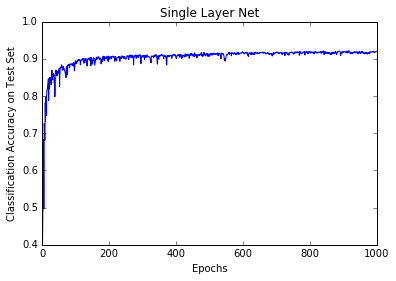

In [3]:
plt.plot(acc_hist)
plt.title('Single Layer Net')
plt.xlabel('Epochs')
plt.ylabel('Classification Accuracy on Test Set')
plt.show()